In [1]:
!pip install scikit-surprise

     |████████████████████████████████| 6.4 MB 4.4 MB/s eta 0:00:01     |██████████████████████████▊     | 5.4 MB 942 kB/s eta 0:00:02
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp37-cp37m-macosx_10_9_x86_64.whl size=830627 sha256=0edcd329a8138eab49583effdc058193201d75a6837d512d2c4dfc432d500000
  Stored in directory: /Users/debasissaha/Library/Caches/pip/wheels/14/21/49/2712122e4f70026a9f8c7e0bb6b77fd1da5e84778ec27af6a7
Successfully built scikit-surprise


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
# Import libraries from Surprise package
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD

## Exploring Data

In [2]:
ratings_1 = pd.read_csv('ratings.csv', header=None)

In [3]:
users = pd.read_csv('users - edited.csv')

In [4]:
movies = pd.read_csv('movies - edited.csv')

In [5]:
ratings_1.head()

,0
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [6]:
ratings = ratings_1[0].str.split("::", expand = True) 

In [7]:
ratings.rename(columns = {0:'user_id', 1:'movie_id', 2:'rating', 3:'timestamp'}, inplace = True) 

In [8]:
ratings.drop('timestamp', axis=1, inplace=True)
#We don't need timestamp

In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   user_id   1000209 non-null  object
 1   movie_id  1000209 non-null  object
 2   rating    1000209 non-null  object
dtypes: object(3)
memory usage: 22.9+ MB


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [11]:
users.head()

,user_id,gender,age_desc,occupation_id,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [12]:
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
ratings.describe()

,user_id,movie_id,rating
count,1000209,1000209,1000209
unique,6040,3706,5
top,4169,2858,4
freq,2314,3428,348971


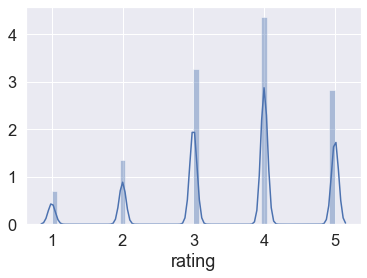

In [15]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))
#Most people tend to be generous in their ratings

In [31]:
ratings['user_id']=ratings['user_id'].astype(int)
ratings['movie_id']=ratings['movie_id'].astype(int)
ratings['rating']=ratings['rating'].astype(int)

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        6040 non-null   int64 
 1   gender         6040 non-null   object
 2   age_desc       6040 non-null   int64 
 3   occupation_id  6040 non-null   int64 
 4   zipcode        6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


#### Merging all 3 datasets

In [20]:
dataset = pd.merge(pd.merge(movies, ratings), users)

#### Top 20 movies

In [21]:
dataset[['title','genre','rating']].sort_values('rating', ascending=False).head(20)

,title,genre,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,Matrix The (1999),Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,Simple Plan A (1998),Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


#### While building a content based recommendation engine the assumption will be that similar genres will have similar content

In [22]:
#List of unique genres
genre_labels = set()
for genre in movies.genre.str.split('|').values:
    genre_labels = genre_labels.union(set(genre))

#Number of times the genre appears
keyword_count = dict()
for genre in genre_labels:
    keyword_count[genre] = 0
for keyword in movies.genre.str.split('|'):
    for s in [s for s in keyword if s in genre_labels]:
        keyword_count[s]+=1
        
#Convert dictionary to list
keywords_occurence=[]
for k,v in keyword_count.items():
    keywords_occurence.append([k,v])
    
#Sort genre by frequency    
keywords_occurence.sort(key=lambda x: x[1], reverse=True)

In [23]:
keywords_occurence

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471],
 ['Horror', 343],
 ['Adventure', 283],
 ['Sci-Fi', 276],
 ["Children's", 251],
 ['Crime', 211],
 ['War', 143],
 ['Documentary', 127],
 ['Musical', 114],
 ['Mystery', 106],
 ['Animation', 105],
 ['Fantasy', 68],
 ['Western', 68],
 ['Film-Noir', 44]]

## Content based recommender system

In [15]:
# Break up the big genre string into a string array
movies['genre'] = movies['genre'].str.split('|')


# Convert genres to string value
movies['genre'] = movies['genre'].fillna("").astype('str')

In [16]:
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']"
1,2,Jumanji (1995),"['Adventure', ""Children's"", 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama']"
4,5,Father of the Bride Part II (1995),['Comedy']


In [17]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genre'])
tfidf_matrix.shape

(3883, 127)

In [18]:
cosine_sim = cosine_similarity(tfidf_matrix)
np.fill_diagonal(cosine_sim, 0 )

In [19]:
cosine_sim.shape

(3883, 3883)

In [22]:
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

In [23]:
indices

title
Toy Story (1995)                         0
Jumanji (1995)                           1
Grumpier Old Men (1995)                  2
Waiting to Exhale (1995)                 3
Father of the Bride Part II (1995)       4
                                      ... 
Meet the Parents (2000)               3878
Requiem for a Dream (2000)            3879
Tigerland (2000)                      3880
Two Family House (2000)               3881
Contender The (2000)                  3882
Length: 3883, dtype: int64

In [25]:
def genre_recommendation(title):
    idx=indices[title]
    ranked = np.argsort(cosine_sim[idx])
    largest_indices = ranked[::-1]
    return titles.iloc[largest_indices]

In [28]:
genre_recommendation("Toy Story (1995)").head(10)

2285                         Rugrats Movie The (1998)
2073        American Tail: Fievel Goes West An (1991)
3685    Adventures of Rocky and Bullwinkle The (2000)
2286                              Bug's Life A (1998)
3045                               Toy Story 2 (1999)
1050           Aladdin and the King of Thieves (1996)
3542                            Saludos Amigos (1943)
3682                               Chicken Run (2000)
2072                          American Tail An (1986)
236                              Goofy Movie A (1995)
Name: title, dtype: object

In [33]:
genre_recommendation("Requiem for a Dream (2000)").head(10)

721                   Low Life The (1994)
3153                        Carmen (1984)
959          Cat on a Hot Tin Roof (1958)
435                 Dangerous Game (1993)
954              Walk in the Sun A (1945)
949         Little Lord Fauntleroy (1936)
947               Of Human Bondage (1934)
945             Scarlet Letter The (1926)
2317    Jerry Springer: Ringmaster (1998)
444                       Fearless (1993)
Name: title, dtype: object

## Collaborative Filtering - User-User

In [32]:
#Mean rating for each user
ratings_mean = ratings.groupby(['user_id'], as_index = False, sort = False)['rating'].mean().rename(columns = {'rating': 'rating_mean'})

In [33]:
ratings_mean

,user_id,rating_mean
0,1,4.188679
1,2,3.713178
2,3,3.901961
3,4,4.190476
4,5,3.146465
...,...,...
6035,6036,3.302928
6036,6037,3.717822
6037,6038,3.800000
6038,6039,3.878049


In [34]:
ratings = pd.merge(ratings,ratings_mean,on = 'user_id', how = 'left', sort = False)

In [35]:
#Normalised rating for each user
ratings['rating_adjusted']=ratings['rating']-ratings['rating_mean']

In [37]:
ratings.head()

,user_id,movie_id,rating,rating_mean,rating_adjusted
0,1,1193,5,4.188679,0.811321
1,1,661,3,4.188679,-1.188679
2,1,914,3,4.188679,-1.188679
3,1,3408,4,4.188679,-0.188679
4,1,2355,5,4.188679,0.811321


In [39]:
rating_final=pd.pivot_table(ratings,values='rating_adjusted',index='user_id',columns='movie_id')

In [40]:
rating_final.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.811321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,-1.146465,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Replacing Nan values with mean
rating_final_user = rating_final.apply(lambda row:row.fillna(row.mean()), axis=1)

In [43]:
rating_final_user.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,8.113208e-01,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,...,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16,-4.021940e-16
2,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,...,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16,1.962255e-16
3,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,...,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17,7.836868e-17
4,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,...,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16,-2.114711e-16
5,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16,-1.146465e+00,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16,...,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16,-4.553036e-16


In [43]:
#User similarity
cosine = cosine_similarity(rating_final_user)
np.fill_diagonal(cosine, 0 )
user_similarity = pd.DataFrame(cosine,index=rating_final_user.index)
user_similarity.columns=rating_final_user.index
user_similarity.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.032665,-0.032267,0.016359,-0.016774,0.045229,0.014314,0.013465,0.061905,-0.004469,...,0.012852,0.034246,0.054216,-3.728633e-03,0.069408,-0.038463,0.000283,-1.115864e-29,0.011725,0.005210
2,0.032665,0.000000,0.023592,-0.016699,-0.032420,-0.019154,0.062835,-0.002045,0.060978,-0.004654,...,-0.002849,0.012514,0.080611,-6.569508e-03,0.076127,0.088853,0.054506,-1.309591e-02,0.032720,-0.006562
3,-0.032267,0.023592,0.000000,0.042521,-0.031153,-0.010965,0.057895,-0.040328,-0.021620,0.003036,...,-0.016524,0.005764,-0.027753,3.398820e-30,0.009517,0.028658,0.001249,4.640786e-02,0.048975,-0.041902
4,0.016359,-0.016699,0.042521,0.000000,-0.002730,0.032028,-0.031510,0.031002,0.021538,-0.038158,...,-0.038547,0.002558,-0.004579,-1.342204e-29,-0.051202,0.043721,0.014981,-7.301069e-02,-0.011580,0.035714
5,-0.016774,-0.032420,-0.031153,-0.002730,0.000000,-0.045909,0.009393,0.045783,0.015280,-0.004929,...,0.019115,0.013596,0.000476,1.127001e-02,0.061089,0.049306,-0.023689,-3.528555e-02,0.017825,0.064367


In [44]:
def find_n_neighbours(df,n):
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index,index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [45]:
# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(user_similarity,30)
sim_user_30_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
user_id,,,,,,,,,,,,,,,,,,,,,
1,1337,379,5404,49,2607,5739,5635,2495,4159,4724,...,2345,6008,942,2766,1568,89,1283,933,2224,1311
2,1546,4248,4975,4320,82,2771,5864,5353,2765,3540,...,2393,5175,1739,3295,2814,4313,4148,2485,4505,5689
3,5709,5417,84,5635,1510,5497,3753,686,5478,3148,...,2490,2463,5732,410,4320,5879,4603,4915,4129,455
4,446,491,1236,3186,5119,3263,4030,2227,5819,51,...,2354,205,3535,3658,5332,4632,481,3580,4947,3915
5,3899,5694,3267,1211,4860,1636,5826,5440,5749,1484,...,1087,5797,498,5378,1519,4620,2947,3685,39,752


In [46]:
#Cross checking the results
#On sorting the similarity values with respect to user 1 we get the same result
user_similarity.iloc[:,0].sort_values(ascending=False).iloc[:30]

user_id
1337    0.189242
379     0.159893
5404    0.155154
49      0.148455
2607    0.148105
5739    0.146056
5635    0.144795
2495    0.139092
4159    0.138192
4724    0.135727
2459    0.134369
1336    0.128491
2652    0.127960
5541    0.127067
223     0.126104
1728    0.125631
2862    0.123467
1574    0.121240
485     0.120725
682     0.119737
2345    0.119582
6008    0.118698
942     0.118137
2766    0.118049
1568    0.117574
89      0.117146
1283    0.115477
933     0.114824
2224    0.114677
1311    0.112265
Name: 1, dtype: float64

In [44]:
def User_item_score(user,item):
    a = sim_user_30_u[sim_user_30_u.index==user].values
    b = a.squeeze().tolist()
    c = rating_final_user.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = ratings_mean.loc[ratings_mean['user_id'] == user,'rating_mean'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = user_similarity.loc[user,index]
    fin = pd.DataFrame({'adj_score':f.values, 'correlation':corr})
    fin['score']=fin.apply(lambda x:x['adj_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [48]:
User_item_score(6,1)
#User 6 would rate movie 1 as 3.92, which is pretty close to the actual result

3.9213572660200477

In [49]:
ratings[ratings["movie_id"]==1]

,user_id,movie_id,rating,rating_mean,rating_adjusted
40,1,1,5,4.188679,0.811321
469,6,1,4,3.901408,0.098592
581,8,1,4,3.884892,0.115108
711,9,1,5,3.735849,1.264151
837,10,1,5,4.114713,0.885287
...,...,...,...,...,...
997248,6022,1,5,3.854167,1.145833
997541,6025,1,5,3.302583,1.697417
998170,6032,1,4,4.134615,-0.134615
998360,6035,1,4,2.610714,1.389286


In [50]:
ratings = ratings.astype({"movie_id": str})
Movie_user = ratings.groupby(by = 'user_id')['movie_id'].apply(lambda x:','.join(x))

In [51]:
def recommend_movie(user):
    Movie_seen_by_user = rating_final.columns[rating_final[rating_final.index==user].notna().any()].tolist()
    a = sim_user_30_u[sim_user_30_u.index==user].values
    b = a.squeeze().tolist()
    d = Movie_user[Movie_user.index.isin(b)]
    l = ','.join(d.values)
    Movie_seen_by_similar_users = l.split(',')
    Movies_under_consideration = list(set(Movie_seen_by_similar_users)-set(list(map(str, Movie_seen_by_user))))
    Movies_under_consideration = list(map(int, Movies_under_consideration))
    score = []
    for item in Movies_under_consideration:
        c = rating_final_user.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = ratings_mean.loc[ratings_mean['user_id'] == user,'rating_mean'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = user_similarity.loc[user,index]
        fin = pd.DataFrame({'adj_score':f.values, 'correlation':corr})
        fin['score']=fin.apply(lambda x:x['adj_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'movie_id':Movies_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Movie_Name = top_5_recommendation.merge(movies, how='inner', on='movie_id')
    Movie_Names = Movie_Name.title.values.tolist()
    return Movie_Names

In [52]:
recommend_movie(370)

['Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Matrix The (1999)',
 'Saving Private Ryan (1998)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Abyss The (1989)']

In [53]:
movies[movies["title"].isin(['Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Matrix The (1999)',
 'Saving Private Ryan (1998)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Abyss The (1989)'])]

,movie_id,title,genre
257,260,Star Wars: Episode IV - A New Hope (1977),"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
1111,1127,Abyss The (1989),"['Action', 'Adventure', 'Sci-Fi', 'Thriller']"
1178,1196,Star Wars: Episode V - The Empire Strikes Back...,"['Action', 'Adventure', 'Drama', 'Sci-Fi', 'War']"
1959,2028,Saving Private Ryan (1998),"['Action', 'Drama', 'War']"
2502,2571,Matrix The (1999),"['Action', 'Sci-Fi', 'Thriller']"


## SVD using Surprise Package

In [65]:
# Loading Reader
reader = Reader(rating_scale=(1, 5))

# Load ratings dataset with Dataset
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

In [66]:
# Use the SVD algorithm.
svd = SVD()

In [67]:
# Run 5-fold cross-validation and print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8743  0.8731  0.8733  0.8740  0.8754  0.8740  0.0008  
MAE (testset)     0.6857  0.6851  0.6862  0.6864  0.6873  0.6861  0.0007  
Fit time          76.32   76.03   76.29   76.56   75.89   76.22   0.24    
Test time         5.08    5.50    4.95    5.01    4.83    5.07    0.23    


{'test_rmse': array([0.8743048 , 0.87311791, 0.87325702, 0.87404971, 0.87544127]),
 'test_mae': array([0.68565198, 0.68511597, 0.68619884, 0.68636062, 0.68729078]),
 'fit_time': (76.32458591461182,
  76.03298211097717,
  76.28810811042786,
  76.5602650642395,
  75.88727021217346),
 'test_time': (5.08259391784668,
  5.497949838638306,
  4.951226711273193,
  5.007313013076782,
  4.833169937133789)}

In [68]:
# Retrieve the trainset.
trainset = data.build_full_trainset()

In [69]:
# Train the svd algorithm on full trainset.
svd.fit(trainset)

In [70]:
ratings[ratings['user_id'] == 1310][:5]

,user_id,movie_id,rating,rating_mean,rating_adjusted
215928,1310,2988,3,3.75,-0.75
215929,1310,1293,5,3.75,1.25
215930,1310,1295,2,3.75,-1.75
215931,1310,1299,4,3.75,0.25
215932,1310,2243,4,3.75,0.25


In [71]:
svd.predict(1310, 2988)

Prediction(uid=1310, iid=2988, r_ui=None, est=3.4042521216175805, details={'was_impossible': False})

In [72]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [73]:
testset = trainset.build_anti_testset()

In [74]:
predictions = svd.test(testset)

In [75]:
top_n = get_top_n(predictions, n=10)

In [76]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1 ['858', '1272', '2905', '318', '953', '1198', '3196', '1036', '916', '899']
2 ['2905', '953', '527', '260', '2762', '1036', '2324', '1172', '3753', '858']
3 ['2905', '318', '2019', '2609', '3338', '3022', '2467', '912', '1238', '527']
4 ['858', '527', '1262', '318', '953', '2905', '2804', '1304', '1234', '1204']
5 ['1288', '2019', '1199', '1256', '1136', '1361', '750', '923', '1230', '924']
6 ['2501', '905', '2905', '670', '318', '2398', '2324', '899', '969', '904']
7 ['527', '745', '318', '3338', '2905', '3671', '858', '1272', '1036', '904']
8 ['2804', '858', '318', '1136', '1200', '1214', '750', '1387', '1206', '260']
9 ['296', '2905', '260', '1198', '110', '858', '1197', '1193', '1196', '2804']
10 ['1907', '3916', '2905', '3851', '1527', '3338', '500', '2565', '602', '2197']
11 ['296', '1208', '1206', '1193', '1222', '1263', '1298', '1921', '1258', '1237']
12 ['318', '527', '2728', '2905', '2019', '1287', '3091', '1178', '920', '1204']
13 ['2905', '953', '356', '1193', '858', '232

In [83]:
movies[movies["movie_id"].isin(['2804', '858', '318', '1136', '1200', '1214', '750', '1387', '1206', '260'])]

,movie_id,title,genre
257,260,Star Wars: Episode IV - A New Hope (1977),"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
315,318,Shawshank Redemption The (1994),['Drama']
740,750,Dr. Strangelove or: How I Learned to Stop Worr...,"['Sci-Fi', 'War']"
847,858,Godfather The (1972),"['Action', 'Crime', 'Drama']"
1120,1136,Monty Python and the Holy Grail (1974),['Comedy']
1182,1200,Aliens (1986),"['Action', 'Sci-Fi', 'Thriller', 'War']"
1188,1206,Clockwork Orange A (1971),['Sci-Fi']
1196,1214,Alien (1979),"['Action', 'Horror', 'Sci-Fi', 'Thriller']"
1366,1387,Jaws (1975),"['Action', 'Horror']"
2735,2804,Christmas Story A (1983),"['Comedy', 'Drama']"


In [84]:
movies_watched_by_8=ratings[ratings["user_id"]==8].movie_id

In [87]:
movies[movies["movie_id"].isin(movies_watched_by_8)].head(10)

,movie_id,title,genre
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama']"
13,14,Nixon (1995),['Drama']
15,16,Casino (1995),"['Drama', 'Thriller']"
16,17,Sense and Sensibility (1995),"['Drama', 'Romance']"
23,24,Powder (1995),"['Drama', 'Sci-Fi']"
24,25,Leaving Las Vegas (1995),"['Drama', 'Romance']"
35,36,Dead Man Walking (1995),['Drama']
38,39,Clueless (1995),"['Comedy', 'Romance']"
41,42,Dead Presidents (1995),"['Action', 'Crime', 'Drama']"
